In [19]:
import traceback
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns

# Extraction function
def tflog2pandas(path):
    runlog_data = pd.DataFrame({"metric": [], "value": [], "step": [], "wall_time": []})
    try:
        event_acc = EventAccumulator(path, size_guidance={"scalars": 0})
        event_acc.Reload()
        tags = event_acc.Tags()["scalars"]
        for tag in tags:
            event_list = event_acc.Scalars(tag)
            values = list(map(lambda x: x.value, event_list))
            step = list(map(lambda x: x.step, event_list))
            wall_time = list(map(lambda x: x.wall_time, event_list))
            r = {"metric": [tag] * len(step), "value": values, "step": step, "wall_time": wall_time, "algo": [path.split("__")[1]]*len(step)}
            r = pd.DataFrame(r)
            runlog_data = pd.concat([runlog_data, r])
    # Dirty catch of DataLossError
    except Exception:
        print("Event file possibly corrupt: {}".format(path))
        traceback.print_exc()
    return runlog_data

<Axes: xlabel='step', ylabel='value'>

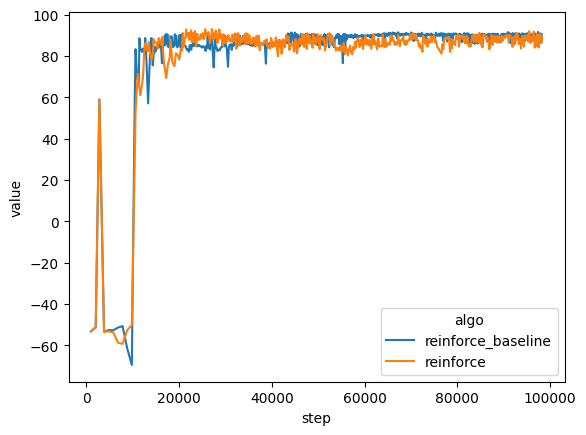

In [22]:
df = pd.concat([
    tflog2pandas("runs/MountainCarContinuous-v0__reinforce_baseline__1__1736766434"),
    tflog2pandas("runs/MountainCarContinuous-v0__reinforce__1__1736766920")
])
sns.lineplot(df[df["metric"] == "episode/mean_return"], x="step", y="value", hue="algo")

In [ ]:
df = pd.concat([
    tflog2pandas("runs/MountainCarContinuous-v0__ppo_continuous__1__1736765447"),
    tflog2pandas("runs/MountainCarContinuous-v0__reinforce_baseline__1__1736766434"),
    tflog2pandas("runs/MountainCarContinuous-v0__reinforce__1__1736766920")
])
sns.lineplot(df[df["metric"] == "episode/mean_return"], x="step", y="value", hue="algo")

<Axes: xlabel='step', ylabel='value'>

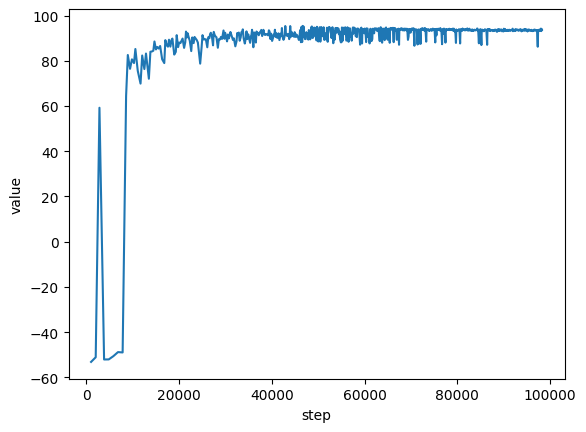

In [ ]:
df = tflog2pandas("runs/MountainCarContinuous-v0__ppo_continuous__1__1736765447")
sns.lineplot(df[df["metric"] == "episode/mean_return"], x="step", y="value")

<Axes: xlabel='step', ylabel='value'>

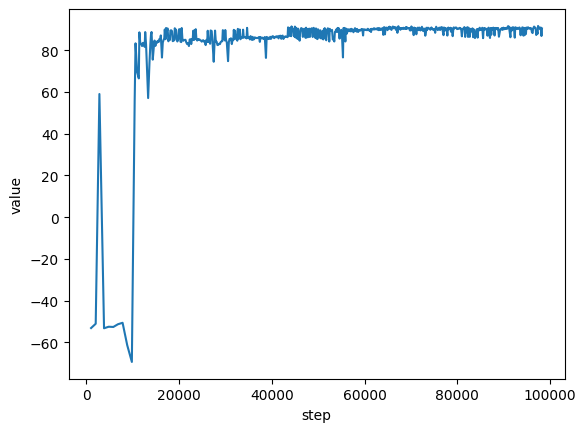

In [13]:
df = tflog2pandas("runs/MountainCarContinuous-v0__reinforce_baseline__1__1736766434")
sns.lineplot(df[df["metric"] == "episode/mean_return"], x="step", y="value")

<Axes: xlabel='step', ylabel='value'>

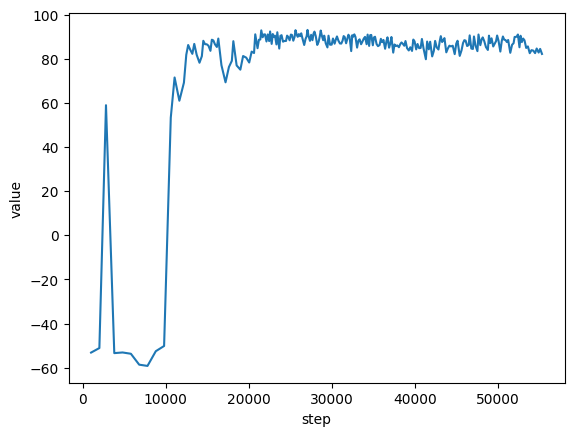

In [16]:
df = tflog2pandas("runs/MountainCarContinuous-v0__reinforce__1__1736766920")
sns.lineplot(df[df["metric"] == "episode/mean_return"], x="step", y="value")